In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

#opening the file and making the date column as index
data = pd.read_csv("JKLQ45.csv", index_col=0, parse_dates=True)
data['Close']

Date
2020-01-02    1011.619995
2020-01-03    1021.489990
2020-01-06    1010.229980
2020-01-07    1014.640015
2020-01-08    1005.450012
                 ...     
2022-02-21     979.780029
2022-02-22     973.739990
2022-02-23     985.080017
2022-02-24     973.650024
2022-02-25     985.539978
Name: Close, Length: 528, dtype: float64

In [2]:
#calculating EMA 12 days
data['EMA12'] = data ['Close'].ewm(span=12, adjust=False).mean()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,EMA12
Date,,,,,,,
2022-02-21,980.909973,984.979980,976.780029,979.780029,979.780029,1762100000,969.924126
2022-02-22,974.099976,978.190002,965.919983,973.739990,973.739990,2053000000,970.511182
2022-02-23,977.830017,985.080017,975.309998,985.080017,985.080017,2134600000,972.752541
2022-02-24,981.890015,986.750000,962.729980,973.650024,973.650024,4096900000,972.890615
2022-02-25,975.799988,988.299988,974.599976,985.539978,985.539978,3117900000,974.836671


In [3]:
#calculating EMA 50 days
data['EMA50'] = data ['Close'].ewm(span=50, adjust=False).mean()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA50
Date,,,,,,,,
2022-02-21,980.909973,984.979980,976.780029,979.780029,979.780029,1762100000,969.924126,953.213920
2022-02-22,974.099976,978.190002,965.919983,973.739990,973.739990,2053000000,970.511182,954.018864
2022-02-23,977.830017,985.080017,975.309998,985.080017,985.080017,2134600000,972.752541,955.236949
2022-02-24,981.890015,986.750000,962.729980,973.650024,973.650024,4096900000,972.890615,955.959030
2022-02-25,975.799988,988.299988,974.599976,985.539978,985.539978,3117900000,974.836671,957.119067


In [5]:
#calculating EMA 30 days
data['EMA30'] = data ['Close'].ewm(span=30, adjust=False).mean()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA50,EMA30
Date,,,,,,,,,
2022-02-21,980.909973,984.979980,976.780029,979.780029,979.780029,1762100000,969.924126,953.213920,959.526080
2022-02-22,974.099976,978.190002,965.919983,973.739990,973.739990,2053000000,970.511182,954.018864,960.443106
2022-02-23,977.830017,985.080017,975.309998,985.080017,985.080017,2134600000,972.752541,955.236949,962.032585
2022-02-24,981.890015,986.750000,962.729980,973.650024,973.650024,4096900000,972.890615,955.959030,962.782097
2022-02-25,975.799988,988.299988,974.599976,985.539978,985.539978,3117900000,974.836671,957.119067,964.250347


<IPython.core.display.Javascript object>


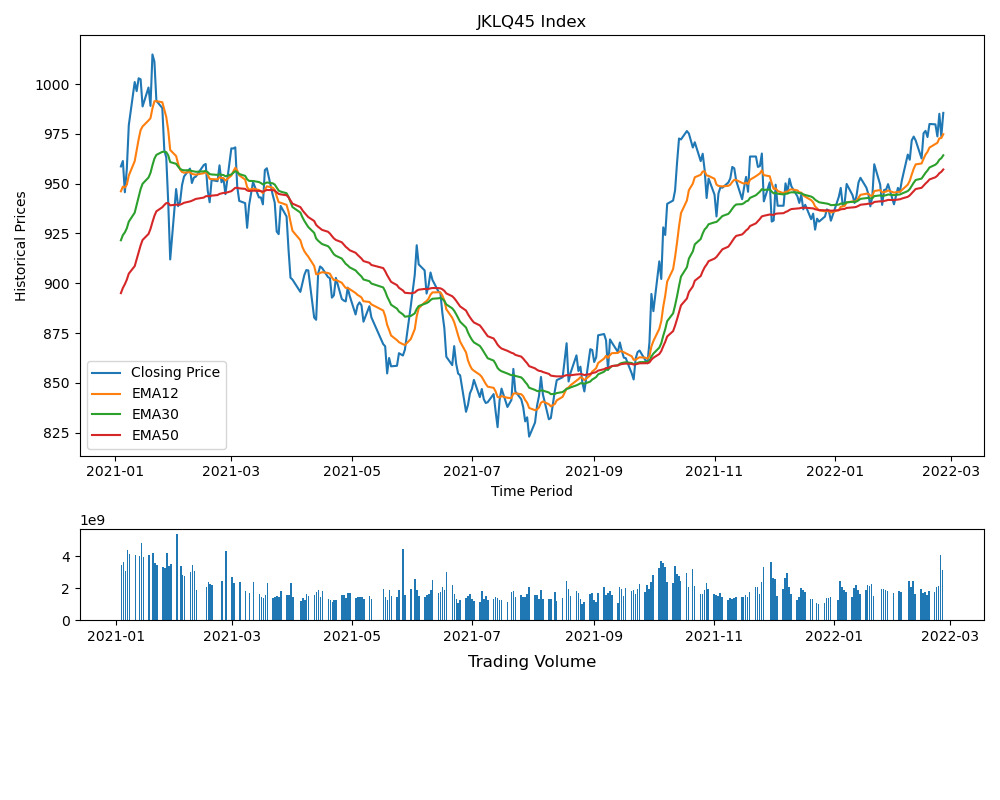

In [6]:
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(data['Close'].loc['2021-01-01':].index, data['Close'].loc['2021-01-01':], label='Closing Price')
top_plt.plot(data['Close'].loc['2021-01-01':].index, data['EMA12'].loc['2021-01-01':], label='EMA12')
top_plt.plot(data['Close'].loc['2021-01-01':].index, data['EMA30'].loc['2021-01-01':], label='EMA30')
top_plt.plot(data['Close'].loc['2021-01-01':].index, data['EMA50'].loc['2021-01-01':], label='EMA50')
plt.xlabel('Time Period')
plt.ylabel('Historical Prices')
plt.title('JKLQ45 Index')
plt.legend()
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(data['Volume'].loc['2021-01-01':].index, data['Volume'].loc['2021-01-01':])
plt.title('\nTrading Volume', y=-0.60)
plt.gcf().set_size_inches(10,8)
plt.tight_layout()